# Ejercicios de simulación
### Liliana Hernandez - Julieth Perea  - Anjely Amazo


## Distribuciones de probabilidad

Recordemos que una distribución de probabilidad es una función, que asigna a cada suceso que representa la variable la probabilidad de que éste ocurra.

Las distribuciones de probabilidad se pueden agrupar según el tipo de variable que se está estudiando

**Para variables aleatorias discretas**
Tengamos presente que las variables aleatorias discretas son aquellas que representan una cantidad *contable* de sucesos.

### Distribución binomial
La distribución binomial se caracteriza por tener un experimento con dos posibles resultados, *éxito* con probabilidad de ocurrencia $p$, y *fracaso* con probabilidad $1-p$, el cual se repite $n$ veces de manera independiente.

Para representar que una variable aleatoria $X$ sigue una distribución binomial de parámetros $n$ y $p$, se escribe:

$${\displaystyle X\sim B(n,p)\,}$$

Su función de probabilidad es:
$${\displaystyle \!f(x)={n \choose x}p^{x}(1-p)^{n-x},\,\,\,\,0\leq p\leq 1}$$
donde ${\displaystyle x=\{0,1,2,\dots ,n\},}$


**Ejemplo**

Supongamos que se lanza un dado equilibrado (de 6 caras) 60 veces y queremos conocer la probabilidad de que el número 2 salga 10 veces.

Un ensayo de nuestro problema consiste en lanzar el dado una vez, si se considera como éxito obtener un 3 y fracaso si no sale 3. Definiendo $X:=$ el número de veces que se obtiene un 2 en 60 lanzamientos.

De lo anterior se puede afirmar que $X \sim B(60, 1/6)$ y la probabilidad a calcular es $P(X=10)$:

$${\displaystyle \!P(X=10)={60\choose 10}(1/6)^{10}(1-1/6)^{60-10}=0.0000744\,\!}\approx0.137013.$$

Para utilizar ésta y las demás distribuciones de probabilidad en Python debemos trener presente lo siguiente:

Se trabajará con el paquete `scipy.stats`, principalmente con las funciones: 

`cdf(x)`: Función de distribución F(X)

`sf(x)`: 1 - cdf(x)

`pmf(x)`: Función de probabilidad f(x) (distribuciones discretas)

`pdf(x)`: Función de densidad f(x) (distribuciones continuas)

`ppf(x)`: Función inversa a cdf(x). Nos permite obtener el valor correspondiente a una probabilidad.

Para resolver el problema anterior con el uso de Python debemos seguir los siguientes pasos:

In [74]:
import scipy.special as ssp
import scipy.integrate as integrate
import scipy.optimize as so
import scipy.interpolate as interpolate
import scipy.fft as sft
import scipy.signal as ssg
import scipy.spatial as spatial
import scipy.linalg as sla 


In [75]:
# Paquetes
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
X = ss.binom(10,1/6)

In [4]:
X.pmf(9)

8.269085843960115e-07

In [5]:
X60 = ss.binom(60,1/6)
X60.pmf(10)

0.13701311426747875

Es decir la probabilidad es del 13.70%

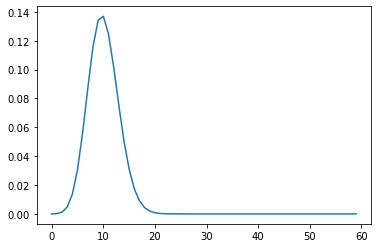

In [6]:
x= np.arange(0,60,1)
y=[X60.pmf(i) for i in range (0,60,1)]
plt.plot(x,y)

#### Números aleatorios a partir de la binomial

En este apartado usaremos numpy.random para generar una sucesión de 1000 números que se escogen según una distribución binomial. En este sentido, resolveremos el problema anterior a partir de esa escogencia.


In [7]:
bin_rand=np.random.binomial(60,1/6,size=1000)

(array([  6.,  21.,  91.,  90., 257., 250.,  86., 129.,  54.,  16.]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <a list of 10 Patch objects>)

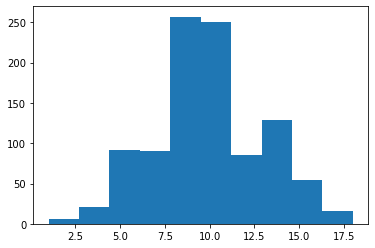

In [8]:
plt.hist(bin_rand)

(array([  6.,  36., 146., 254., 255., 203.,  66.,  26.,   7.,   1.]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <a list of 10 Patch objects>)

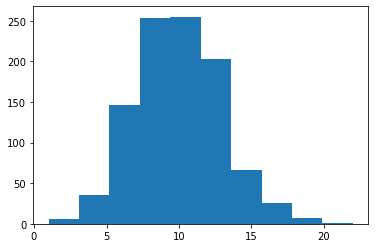

In [9]:
np.random.seed(2021)
bin_rand=np.random.binomial(60,1/6,size=1000)
plt.hist(bin_rand)

In [10]:
Ej1_Conteo=np.unique(bin_rand)
Ej1_Conteo

Cant=np.unique(bin_rand, return_counts=True)
Cant


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 22]),
 array([  1,   2,   3,  12,  24,  54,  92, 119, 135, 123, 132, 122,  81,
         43,  23,  17,   9,   5,   2,   1], dtype=int64))

**Ejercicio 1**

Crear un programa para estudiar la distribución en el arreglo anterior. Un histograma es uti, sin embargo como la distribución es discreta es util calcular una tabla de frecuencias.

```Python
#recomendaciones

np.count_nonzero()
np.unique()
np.sum()
```

In [11]:
Ej1_Arr = np.unique(bin_rand)
dfEj1 = pd.DataFrame(columns=['Valor', 'Real', 'Estimado'])

In [14]:
dfEj1 = pd.DataFrame(columns=['Valor', 'Frecuencia','Real', 'Estimado'])
j=0
#i=0
for A in Ej1_Arr:
    j=np.sum([1 for i  in bin_rand if i== A])
    dfEj1= dfEj1.append({'Valor': A, 'Frecuencia':j, 'Real':j/len(bin_rand), 'Estimado':X60.pmf(A)}, ignore_index=True)
    
dfEj1

,Valor,Frecuencia,Real,Estimado
0,1.0,1.0,0.001,0.000213
1,2.0,2.0,0.002,0.001256
2,3.0,3.0,0.003,0.004858
3,4.0,12.0,0.012,0.013847
4,5.0,24.0,0.024,0.031016
5,6.0,54.0,0.054,0.056863
6,7.0,92.0,0.092,0.087731
7,8.0,119.0,0.119,0.116244
8,9.0,135.0,0.135,0.134327
9,10.0,123.0,0.123,0.137013


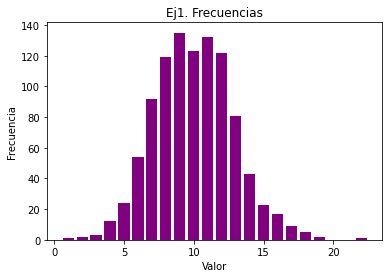

In [15]:
eje_x = dfEj1['Valor']
eje_y = dfEj1['Frecuencia']
plt.bar(eje_x, eje_y,color="purple")
plt.ylabel('Frecuencia')
plt.xlabel('Valor')
plt.title('Ej1. Frecuencias')
plt.show()

**Ejercicio 2**

Dar una respuesta aproximada del ejercicio anterior a partir del arreglo `bin_rand`.

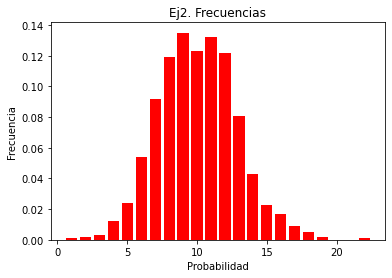

In [16]:
eje_x = dfEj1['Valor']
eje_y = dfEj1['Real']
plt.bar(eje_x, eje_y,color="Red")
plt.ylabel('Frecuencia')
plt.xlabel('Probabilidad')
plt.title('Ej2. Frecuencias')
plt.show()

### Distribución de Poisson
Es una distribución de probabilidad discreta que a partir de una frecuencia de ocurrencia media, sirve para hallar la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo.

Para representar que una variable aleatoria $X$ sigue una distribución de Poisson con parámetro $\lambda$, el cual representa el número de veces que se espera que ocurra el fenómeno durante un intervalo dado, usaremos la siguiente notación:

$${\displaystyle X\sim Poi(\lambda)},$$

La función de masa de probabilidad de la distribución de Poisson es

$${\displaystyle f(k,\lambda )={\frac {e^{-\lambda }\lambda ^{k}}{k!}}}$$

siendo $k$ el número de ocurrencias del evento. 

**Ejemplo**

Si el 1% de los libros encuadernados tiene defectos, para obtener la probabilidad de que 10 de 800 libros encuadernados en este taller tengan encuadernaciones defectuosas usamos la distribución de Poisson.

En tal caso $k=10$, $\lambda=8$ ya que es el $1\%$ de $800$
por lo tanto
$${\displaystyle P(10;8)={\frac {8^{10}e^{-8}}{10!}}\approx0,0992615.}$$

In [17]:
X = ss.poisson(8)
X.pmf(10)

0.09926153383153544

Es decir la probabilidad es del 9.92%

### Números aleatorios a partir de Poisson
Replicamos el ejercicio anterior pero con la distribución de Poisson. Pero aquí usaremos una semilla usando la función `np.random.seed()`

In [18]:
# Iniciar semilla 
np.random.seed(123) 

Calcule la diferencia absoluta entre su media y lambda usando `np.mean()` y `abs()`.

**Ejercicio 3**

Replique lo hecho en el ejercicio 2 para esta distribución y resolviendo el ejemplo propuesto.

In [42]:
poi_ran=np.random.poisson(8,1000)
Ej3_Arr = np.unique(poi_ran)

In [34]:
dfEj3 = pd.DataFrame(columns=['Valor', 'Frecuencia','Real'])
j=0
for A in Ej3_Arr:
    j=np.sum([1 for i  in poi_ran if i== A])
    dfEj3= dfEj3.append({'Valor': A, 'Frecuencia':j, 'Real':j/len(poi_ran)}, ignore_index=True)
    
dfEj3

,Valor,Frecuencia,Real
0,1.0,1.0,0.001
1,2.0,14.0,0.014
2,3.0,28.0,0.028
3,4.0,61.0,0.061
4,5.0,105.0,0.105
5,6.0,119.0,0.119
6,7.0,126.0,0.126
7,8.0,138.0,0.138
8,9.0,118.0,0.118
9,10.0,109.0,0.109


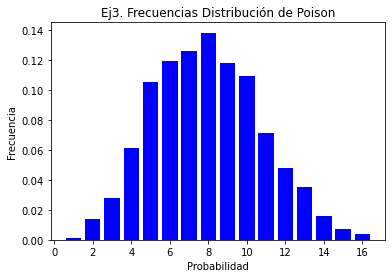

In [60]:
eje_x = dfEj3['Valor']
eje_y = dfEj3['Real']
plt.bar(eje_x, eje_y,color="Blue")
plt.ylabel('Frecuencia')
plt.xlabel('Probabilidad')
plt.title('Ej3. Frecuencias Distribución de Poison')
plt.show()

### Distribución hipergeométrica
Ésta es una distribución discreta relacionada con muestreos aleatorios y sin reemplazo, es decir, si se tienen $N$ elementos de los cuales, $d$ pertenecen a la categoría $A$ y los demás, $N-d$, a la categoría $B$. La distribución hipergeométrica mide la probabilidad de obtener $x$ elementos de la categoría $A$, para $({\displaystyle 0\leq x\leq d})$, en una muestra sin reemplazo de $n$ elementos de la población original.

La función de probabilidad de una variable aleatoria con distribución hipergeométrica es igual a

$${\displaystyle P(X=x)={\frac {{d \choose x}{N-d \choose n-x}}{N \choose n}}.}$$

**Ejemplo**

Se formó un jurado de 6 personas de un grupo de 20 posibles miembros de los cuales 8 eran mujeres y 12 hombres. El jurado seelecionó aleatoriamente, ¿cuál es la probabilidad de que el jurado tenga exactamente una mujer?

$$P(20,8,6;1)={\frac {{8 \choose 1}{20-8 \choose 6-1}}{20 \choose 6}}\approx 0.16346$$

In [36]:
X = ss.hypergeom(20,6,8)
X.pmf(1)

0.16346749226006166

Es decir la probabilidad es del 16.34%

### Números aleatorios a partir de hipergeométrica

**Ejercicio 4**

Haga un arreglo de 1000 números escogido según una distribución hipergemétrica.

In [45]:
hip_ran = np.random.hypergeometric(20,6,8, 1000)
Ej4_Arr = np.unique(hip_ran)

In [47]:
dfEj4 = pd.DataFrame(columns=['Valor', 'Frecuencia','Real'])
j=0
for A in Ej4_Arr:
    j=np.sum([1 for i  in hip_ran if i== A])
    dfEj4= dfEj4.append({'Valor': A, 'Frecuencia':j, 'Real':j/len(hip_ran)}, ignore_index=True)
    
dfEj4

,Valor,Frecuencia,Real
0,3.0,3.0,0.003
1,4.0,41.0,0.041
2,5.0,191.0,0.191
3,6.0,366.0,0.366
4,7.0,308.0,0.308
5,8.0,91.0,0.091


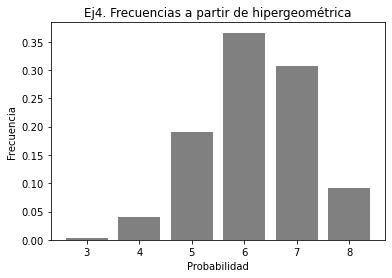

In [59]:
eje_x = dfEj4['Valor']
eje_y = dfEj4['Real']
plt.bar(eje_x, eje_y,color="Gray")
plt.ylabel('Frecuencia')
plt.xlabel('Probabilidad')
plt.title('Ej4. Frecuencias a partir de hipergeométrica')
plt.show()

## Variables aleatorias continuas
Por otro lado, las variables aleatorias continuas, son las que resultan generalmente de la medición y, pueden tomar cualquier valor dentro de un intervalo.

### Distribución Normal
Es la distribución que se aplica en la mayor cantidad de situaciones, en las que se trabaje con una variable aleatoria continua en un grupo o población dada. Ejemplos de tales situaciones son, las estaturas de hombre, mujeres, variaciones en la medición de diferentes cantidades, etc.

Los parámetros que necesitamos definir para estudiar la distribución normal son $\mu$ que es la media;  $\sigma$ que representa la desviación típica, de modo que $\sigma^2$ es la varianza. Si consideramos el caso especial de la función donde ${\displaystyle \mu =0}$ y ${\displaystyle \sigma =1}$, llamaremos a tal función como distribución normal estándar.
    
$$N(x;  μ,σ) = ∫_{-∞}^{x} f(u; μ,σ) du$$
donde $f(u; μ,σ)$ es la función densidad de probabilidad:

$$f(u; μ,σ) = \frac{1}{σ\sqrt{2π}} e^{\frac{-(u-\mu)^2}{2σ^2}}$$

Muchas veces cuando no se posee un software, se hace necesario el uso de valores ya calculados que por lo general están consignados en tablas y son documentos de fácil acceso.

**Ejemplo **

Suponga que tiene un conjunto de datos aleatorios $X$ que siguen una distribución normal de media $10$ y desviación típica $2$. Se pide encontrar la probabilidad de que:

1. La variable aleatoria $x$ sea menor o igual a 8.



In [50]:
X = ss.norm(10,2)

In [51]:
X.cdf(8) # La propabilidad es del 15.86%

0.15865525393145707

2. Sea menor o igual a 10.

In [52]:
X.cdf(10) # La propabilidad es del 50%

0.5

3.  Que la variable $x$ esté por debajo de 12.


In [53]:
X.cdf(12) # La propabilidad es del 84.13%

0.8413447460685429

4. La probabilidad que un valor $x$ esté entre 8 y 12.

In [54]:
X.cdf(12)-X.cdf(8) # La propabilidad es del 68.26%

0.6826894921370859

**Ejercicio 5**

Haga un arreglo de 1000 números escogidos según una distribución normal.

In [65]:
media=25
dEst=1.2
norm_ran = np.random.normal(media,dEst, 1000)  #media 25 , desviación estandar 1.2
Ej5_Arr = np.unique(norm_ran)

In [66]:
dfEj5 = pd.DataFrame(columns=['Valor', 'Frecuencia','Real'])
j=0
for A in Ej5_Arr:
    j=np.sum([1 for i  in norm_ran if i== A])
    dfEj5= dfEj5.append({'Valor': A, 'Frecuencia':j, 'Real':j/len(norm_ran)}, ignore_index=True)
    
dfEj5

,Valor,Frecuencia,Real
0,21.189159,1.0,0.001
1,21.362287,1.0,0.001
2,21.386129,1.0,0.001
3,21.542516,1.0,0.001
4,21.571315,1.0,0.001
...,...,...,...
995,28.099696,1.0,0.001
996,28.170697,1.0,0.001
997,28.419145,1.0,0.001
998,28.490661,1.0,0.001


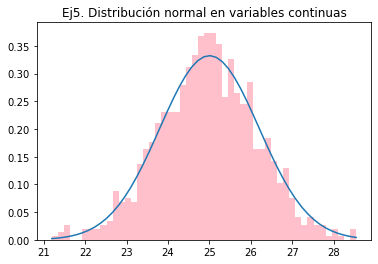

In [70]:
eje_x = dfEj5['Valor']
eje_y = dfEj5['Real']
plt.title('Ej5. Distribución normal en variables continuas')
count, bins, ignored = plt.hist(norm_ran, 50, density=True, color='pink')
plt.plot(bins, 1/(dEst * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - media)**2 / (2 * dEst**2) ))
plt.show()


## Otras escogencias aleatorias - Barajar un juego de cartas
Muchas veces estamos interesados en aleatorizar el orden de un conjunto de elementos. Usaremos `np.random.shuffle ()`, una función que permite mezclar aleatoriamente una secuencia de elementos cualesquiera.


In [76]:
Baraja = []
for i in ["Corazón","Picas","Diamantes","Trébol"]:
    for j in range(13):
        Baraja.append((i,j+1))
# Shuffle the deck
np.random.shuffle(Baraja)
Baraja

[('Trébol', 8),
 ('Trébol', 6),
 ('Diamantes', 4),
 ('Picas', 3),
 ('Diamantes', 11),
 ('Corazón', 3),
 ('Diamantes', 12),
 ('Trébol', 9),
 ('Corazón', 13),
 ('Diamantes', 3),
 ('Picas', 9),
 ('Picas', 10),
 ('Corazón', 12),
 ('Diamantes', 8),
 ('Trébol', 10),
 ('Picas', 8),
 ('Picas', 2),
 ('Diamantes', 1),
 ('Diamantes', 2),
 ('Corazón', 10),
 ('Trébol', 3),
 ('Trébol', 2),
 ('Diamantes', 6),
 ('Trébol', 5),
 ('Diamantes', 5),
 ('Diamantes', 7),
 ('Picas', 7),
 ('Trébol', 11),
 ('Trébol', 13),
 ('Picas', 12),
 ('Trébol', 4),
 ('Diamantes', 10),
 ('Trébol', 12),
 ('Diamantes', 13),
 ('Corazón', 9),
 ('Picas', 4),
 ('Picas', 1),
 ('Corazón', 6),
 ('Corazón', 1),
 ('Corazón', 2),
 ('Corazón', 4),
 ('Picas', 13),
 ('Corazón', 5),
 ('Corazón', 7),
 ('Picas', 11),
 ('Picas', 5),
 ('Corazón', 8),
 ('Corazón', 11),
 ('Diamantes', 9),
 ('Trébol', 1),
 ('Picas', 6),
 ('Trébol', 7)]

# Simulaciones - Casos prácticos
*Tomados de [https://github.com/sukruc/statistical-simulation](https://github.com/sukruc/statistical-simulation)*

## Esquema para modelar eventos reales a partir de procesos estocásticos

- Caracterizado por muestreo aleatorio repetido.
- Nos da una solución aproximada.
- Puede ayudar a resolver problemas complejos.

## Pasos de simulación:

1. Definir posibles resultados para variables aleatorias
2. Asignar posibilidades.
3. Definir relaciones entre variables aleatorias.
4. Obtenga múltiples resultados mediante muestreo repetido.
5. Analice los resultados de la muestra.

### Sacar pares

Jugar parqués propone un primer reto para todos los jugadores, sacar pares para poder salir de la carcel. Este inocente hecho lo retrataremos en un modelo de simulación, seguiremos los pasos descritos anteriormente para entender las probabilidades y posibilidades alrededor el juego. 

En primer lugar debemos entender que la base del proceso de simulación implica un muestreo aleatorio repetido. El primer paso que se refiere a crear una muestra aleatoria consiste en pensar en el lanzamiento de un dado:

In [80]:
p = 1/6
dado, probabilidades, lanzamientos = [1,2,3,4,5,6], [p]*6, 1

# Use np.random.choice to throw the die once and record the outcome
outcome = np.random.choice(dado, size=lanzamientos, p=probabilidades)
print("Salida del lanzamiento: {}".format(outcome[0]))

Salida del lanzamiento: 3


Observe que el vector de probabilidades se asignan valores justos en la salida del dado. En este sentido podemos manipular las probabilidades del ejercicio. Completamos entonces el paso 2. Ahora vamos a definir la relación entre variables aleatorias.

Muchas veces, nuestra simulación involucrará no solo una, sino múltiples variables aleatorias. Considere un juego en el que le tira dos dados y gana si cada dado muestra el mismo número. Aquí tenemos dos variables aleatorias - los dos dados - y una relación entre cada una de ellas - ganamos si muestran el mismo número, perdemos si no. En realidad, la relación entre variables aleatorias puede ser mucho más compleja.

In [81]:
dado, probabilidades, num_dados = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
outcomes = np.random.choice(dado, size=num_dados, p=probabilidades) 

if outcomes[0] == outcomes[1]: 
    answer = '¡Pares!' 
else:
    answer = 'Sigue intentando.'

print("Los dados muestran {} y {}. {}".format(outcomes[0], outcomes[1], answer))

Los dados muestran 5 y 3. Sigue intentando.


Si bien ya somos aptos para crear el juego de sacar pares aún hace falta simular varias opiciones para establecer probabilidades de ganar este juego.

**Ejercicio 6**

¿Cuál es la probabilidad de sacar pares?



In [99]:
dado, probabilidades, num_dados = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
D1=[]
D2=[]
lanzamiento=0
par = 0 
while lanzamiento < 1000:
    outcomes = np.random.choice(dado, size=num_dados, p=probabilidades)
    D1.append(outcomes[0])
    D2.append(outcomes[1])
    if outcomes[0] == outcomes[1]: 
        par=par+1
    lanzamiento = lanzamiento + 1
    
Prob_Par = par/1000
print('La probabilidad de sacar pares es: ',Prob_Par)

par 171
La probabilidad de sacar pares es:  0.171


**Ejercicio 7**

Simule varios juegos de pares y verifique que la probabilidad anterior es correcta.

In [103]:
dado, probabilidades, num_dados = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
D1=[]
D2=[]
lanzamiento=0
par = 0 
QJuegos=int(input('Digite la cantidad de juegos: '))
while lanzamiento < QJuegos:
    outcomes = np.random.choice(dado, size=num_dados, p=probabilidades)
    D1.append(outcomes[0])
    D2.append(outcomes[1])
    if outcomes[0] == outcomes[1]: 
        par=par+1
    lanzamiento = lanzamiento + 1
    
Prob_Par = par/QJuegos
print('La probabilidad de sacar pares es: ',Prob_Par)

Digite la cantidad de juegos: 1000000
La probabilidad de sacar pares es:  0.16675


# Usando la simulación en toma de decisiones

Según lo anterior, el proceso de simulación se simplifica en:

Aquí:
- Pasos 1 y 2: definir los resultados de las variables aleatorias y asignar las probabilidades.
- Paso 3: Definir la relación entre los parámetros del modelo.
- Paso 4: muestrear repetidamente las distribuciones A y B para generar resultados.
- Paso 5: Analizar los resultados.

Utilicemos algunas simulaciones para tomar decisiones.

**Simulando un sorteo de lotería**

Ejecutaremos una simulación completa, tomaremos una decisión basada en nuestros resultados observados y aprenderemos a modificar las entradas al modelo de simulación.

En este caso veremos si queremos o no comprar un boleto de lotería. Suponga que tiene la oportunidad de comprar un boleto de lotería que le da una oportunidad de ganar un gran premio de $\$ $ 1 millón. Como hay 1000 boletos en total, su probabilidad de ganar es de 1 en 1000. Cada boleto cuesta  $\$ $ 10. Usemos nuestra comprensión de las simulaciones básicas para simular primero un sorteo de la lotería.

**Ejercicio 8**

Explique el siguiente código, indique lo que almacena

- `gains`
- `probability`
- `outcome`


In [107]:
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 1000000

# Probability of winning
chance_of_winning = 1/num_tickets

# Code to simulate a single drawing of the lottery
gains = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
probability = [1-chance_of_winning, chance_of_winning]
outcome = np.random.choice(a=gains, size=1, p=probability, replace=True)

print("La ganancia de un juego de lotería es {}".format(outcome))

La ganancia de un juego de lotería es [-10]


## ¿Deberíamos comprar?
En el último ejercicio, simulamos el sorteo aleatorio del billete de lotería una vez. En este ejercicio, completamos el proceso de simulación repitiendo el proceso varias veces.

Repetir el proceso nos da múltiples resultados. Podemos pensar en esto como múltiples universos donde ocurrió el mismo sorteo de lotería. Luego, podemos determinar las ganancias promedio en todos estos universos. Si las ganancias promedio son mayores de lo que pagamos por el boleto, entonces tiene sentido comprarlo, de lo contrario, es posible que no queramos comprar el boleto.

Normalmente, así es como se utilizan las simulaciones para evaluar las inversiones comerciales. Después de completar este ejercicio, tendrá las herramientas básicas necesarias para utilizar simulaciones para la toma de decisiones.

In [113]:
# Initialize size and simulate outcome
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 1000000
chance_of_winning = 1/num_tickets
size = 2000
payoffs = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
probs = [1-chance_of_winning, chance_of_winning]

outcomes = np.random.choice(a=payoffs, size=size, p=probs, replace=True)

# Mean of outcomes.
answer = np.mean(outcomes)
print("Pago promedio de {} simulaciones = {}".format(size, answer))

Pago promedio de 2000 simulaciones = 1990.0


**Ejercicio 9**

¿Qué visualizaciones son adecuadas para indicar los resultados de esta simulación?

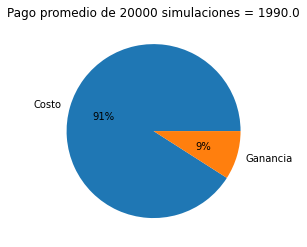

In [114]:
CostoBoletos=size*lottery_ticket_cost
Titulo="Pago promedio de {} simulaciones = {}".format(CostoBoletos, answer)

data = [CostoBoletos,answer]
labels = ['Costo', 'Ganancia']
plt.title(Titulo)


plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

## Calculando un precio de lotería de equilibrio
Las simulaciones nos permiten hacer preguntas más matizadas que no necesariamente tienen una solución analítica fácil. En lugar de resolver una fórmula matemática compleja, obtenemos directamente múltiples resultados de muestra. Podemos realizar experimentos modificando las entradas y estudiando cómo esos cambios impactan en el sistema. Por ejemplo, una vez que tengamos un modelo moderadamente razonable de patrones climáticos globales, podríamos evaluar el impacto del aumento de las emisiones de gases de efecto invernadero.

En el ejemplo de la lotería, es posible que deseemos saber qué tan caro debe ser el boleto para que no tenga sentido comprarlo. Para entender esto, necesitamos modificar el costo del boleto para ver cuándo la recompensa esperada es negativa.

In [119]:
sims, lottery_ticket_cost = 10000, 0


while 1:
    outcomes = np.random.choice([-lottery_ticket_cost, grand_prize-lottery_ticket_cost],
                 size=sims, p=[1-chance_of_winning, chance_of_winning], replace=True)
    if outcomes.mean() < 0:
        break
    else:
        lottery_ticket_cost += 1
answer = lottery_ticket_cost - 1

print("El precio más alto al que tiene sentido comprar el boleto es {}".format(answer))

El precio más alto al que tiene sentido comprar el boleto es 448


**Ejercicio 10**

¿Cómo innterpreta el rendimiento de las anteriores simulaciones? ¿Basta con esa cantidad? ¿Que pasa si se vuelve a correr la celda anterior? ¿Se puede mejorar los resultados de este ejercicio?

In [120]:
sims, lottery_ticket_cost = 100000, 0

while 1:
    outcomes = np.random.choice([-lottery_ticket_cost, grand_prize-lottery_ticket_cost],
                 size=sims, p=[1-chance_of_winning, chance_of_winning], replace=True)

    if outcomes.mean() < 0:
        break
    else:
        #print('este es el ourcomes',outcomes)
        lottery_ticket_cost += 1
        #incremente +1 el valor del ticket
        #print(lottery_ticket_cost)
answer = lottery_ticket_cost - 1
print("El precio más alto al que tiene sentido comprar el boleto es {}".format(answer))

El precio más alto al que tiene sentido comprar el boleto es 829


Al aumentar la cantidad a razon de diez veces se ve un incremeto en la respuesta